In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso

In [3]:
airbnb_df = pd.read_csv("airBNB.csv")

In [4]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
airbnb_df.shape

(48895, 16)

In [8]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [33]:
airbnb_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
month                             10052
dtype: int64

In [10]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb_df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb_df.reviews_per_month.isnull().sum()

0

In [11]:
#let's proceed with examing some interesting categorical unique values
#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb_df.neighbourhood.unique())

221

In [13]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb_df.host_id.value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [15]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb_df.calculated_host_listings_count.max()
top_host_check

327

In [16]:
airbnb_df.duplicated().sum()

0

In [17]:
airbnb_df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [18]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [19]:
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype('category')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('category')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('category')

In [20]:
airbnb_df['neighbourhood_group'].values

['Brooklyn', 'Manhattan', 'Manhattan', 'Brooklyn', 'Manhattan', ..., 'Brooklyn', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan']
Length: 48895
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [21]:
airbnb_df.fillna({'name': 'N/A'}, inplace=True)

In [22]:
Y = airbnb_df['price']
X = pd.get_dummies(airbnb_df[['id',	'name', 'host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>)

In [ ]:
# airbnb_df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
# airbnb_df.head()

In [ ]:
# airbnb_df.to_csv('airbnb_clean.csv')

What are the top 5 most expensive neighborhoods in the dataset based on the listing prices?

In [ ]:
neighborhood_prices = airbnb_df.groupby('neighbourhood')['price'].mean().reset_index()
sorted_neighborhoods = neighborhood_prices.sort_values(by='price', ascending=False)
top_5_expensive_neighborhoods = sorted_neighborhoods.head(5)
print(top_5_expensive_neighborhoods)

      neighbourhood       price
82   Fort Wadsworth  800.000000
219         Woodrow  700.000000
197         Tribeca  490.638418
174        Sea Gate  487.857143
167       Riverdale  442.090909


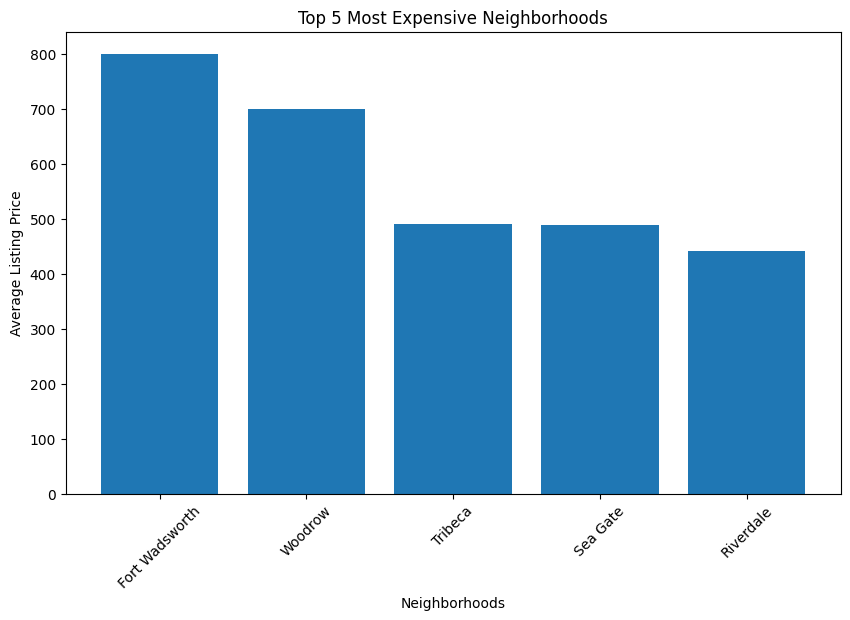

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_neighborhoods['neighbourhood'], top_5_expensive_neighborhoods['price'])
plt.xlabel('Neighborhoods')
plt.ylabel('Average Listing Price')
plt.title('Top 5 Most Expensive Neighborhoods')

plt.xticks(rotation=45)

plt.show()


What is the average price for each room type? 

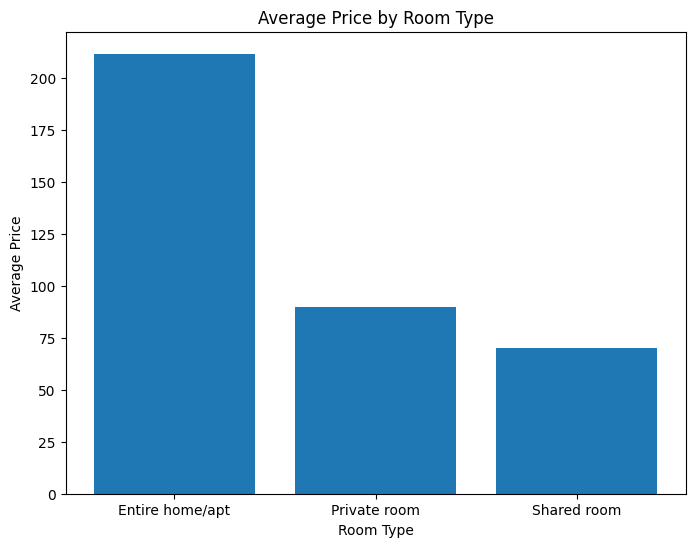

In [23]:
room_type_prices = airbnb_df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(room_type_prices['room_type'], room_type_prices['price'])
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

What is the distribution of listing prices across different property types?

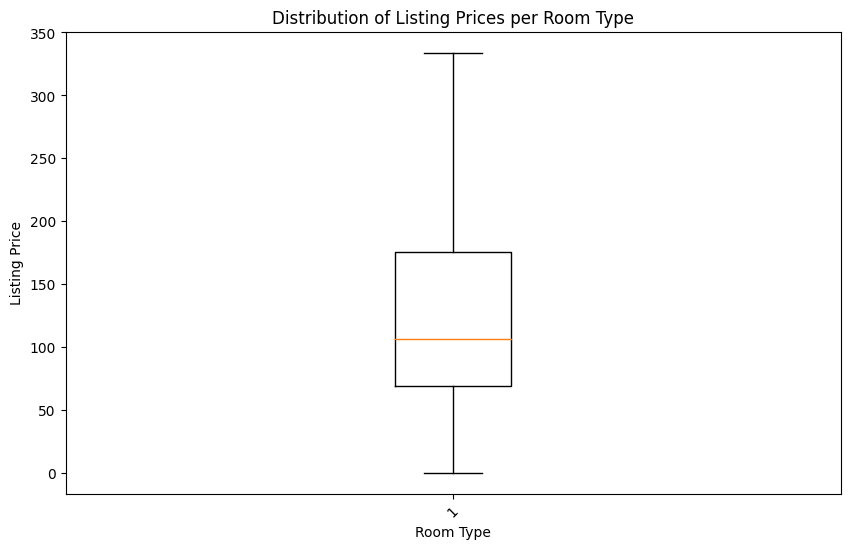

In [26]:
property_prices = airbnb_df.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.boxplot(airbnb_df[airbnb_df['room_type'].isin(property_prices['room_type'])]['price'], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Listing Price')
plt.title('Distribution of Listing Prices per Room Type')
plt.show()

What are the busiest months for Airbnb rentals in terms of booking frequency?

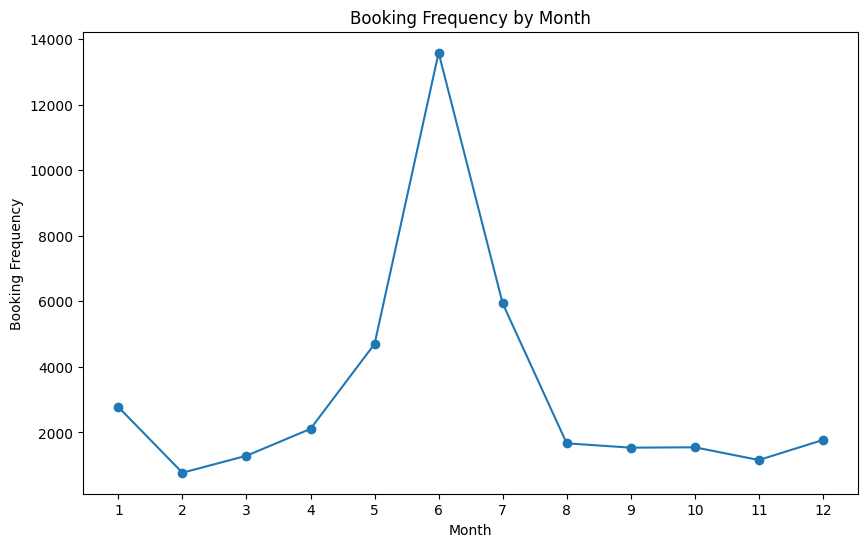

In [29]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['month'] = airbnb_df['last_review'].dt.month
monthly_bookings = airbnb_df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Booking Frequency')
plt.title('Booking Frequency by Month')
plt.xticks(range(1, 13))
plt.show()


Is there a correlation between the number of reviews and the overall rating of a listing?

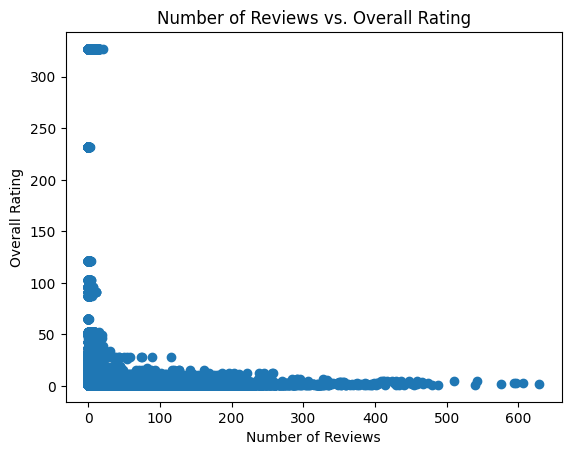

In [32]:
reviews_ratings = airbnb_df[['number_of_reviews', 'calculated_host_listings_count']].dropna()
correlation = reviews_ratings['number_of_reviews'].corr(reviews_ratings['calculated_host_listings_count'])
plt.scatter(reviews_ratings['number_of_reviews'], reviews_ratings['calculated_host_listings_count'])
plt.xlabel('Number of Reviews')
plt.ylabel('Overall Rating')
plt.title('Number of Reviews vs. Overall Rating')
plt.show()


In [31]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,NaN
